In [39]:
import seaborn as sns
#1 Preprocessing phase.
import pandas as pd
df=pd.read_csv("/content/titanic-passengers.csv",encoding="ISO-8859-1",sep=";")
print('the head of df')
df.head()

the head of df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [42]:
df["Embarked"].fillna('S',inplace=True)

In [43]:
print(' Drop the colum Cabin')
df=df.dropna(axis=1)
df.head()

 Drop the colum Cabin


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [44]:
df= df.drop(columns=['Ticket', 'PassengerId']) 


In [45]:

# df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
def title(n):
    c=""
    liste = []
    for x in n:
        c=x.split(',')[1].split('.')[0]
        liste.append(c)
    return liste
df["Title"]=title(df['Name'])
df.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,Mr
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,Mr
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,Mr
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,Mrs
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,Mr


In [46]:
del df['Name']

In [47]:
def title2(n):
    Title_Dictionary = {

                   "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona" :       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
        
        
    liste = []
    for x in n:
        
        liste.append(Title_Dictionary.get(x[1:], "nothing"))
    return liste

df["Title"]=title2(df["Title"])


In [48]:


df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,No,2,male,28.0,0,0,13.0000,S,Mrs
1,No,3,male,25.0,0,0,7.6500,S,Mrs
2,No,3,male,20.0,0,0,7.8542,S,Mrs
3,No,3,female,29.0,0,4,21.0750,S,Mrs
4,No,1,male,31.0,1,0,52.0000,S,Mrs


In [49]:
from sklearn.preprocessing import LabelEncoder
df['Survived'] = df['Survived'].map({'No':0, 'Yes':1})
encoder=LabelEncoder()
df['Embarked']=encoder.fit_transform(df['Embarked' ])
df["Sex"]=encoder.fit_transform(df["Sex"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,1,28.0,0,0,13.0000,2,Mrs
1,0,3,1,25.0,0,0,7.6500,2,Mrs
2,0,3,1,20.0,0,0,7.8542,2,Mrs
3,0,3,0,29.0,0,4,21.0750,2,Mrs
4,0,1,1,31.0,1,0,52.0000,2,Mrs


In [50]:
df['Title']=encoder.fit_transform(df['Title' ])

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df= df.drop(columns=['SibSp', 'Parch']) 
df.head()



,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,1,28.0,13.0000,2,2,1
1,0,3,1,25.0,7.6500,2,2,1
2,0,3,1,20.0,7.8542,2,2,1
3,0,3,0,29.0,21.0750,2,2,5
4,0,1,1,31.0,52.0000,2,2,2


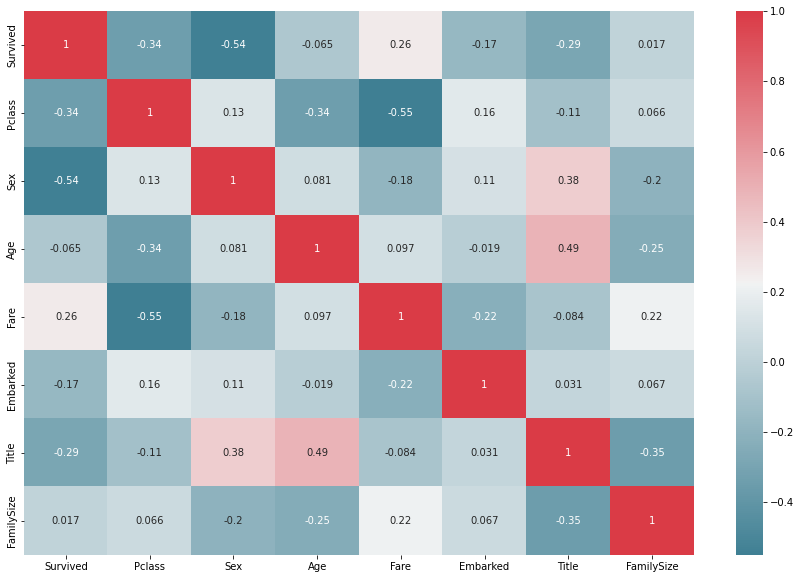

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

In [52]:
from sklearn.preprocessing import LabelEncoder
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x = df[["Pclass", "Age", "Sex", "FamilySize", "Embarked"]]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  #splitting data with test size of 20%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


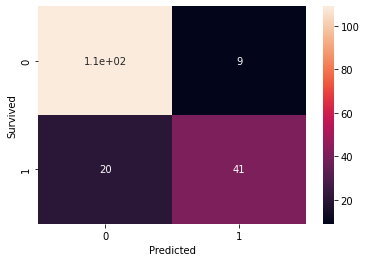

In [53]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Survived'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [54]:

from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear", random_state=0).fit(x_train, y_train)
roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
roc_auc_score(y_train, clf.decision_function(x_train))



0.856231060762441